In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab


In [2]:
# The LoG and DoG Filters
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from numpy import pi

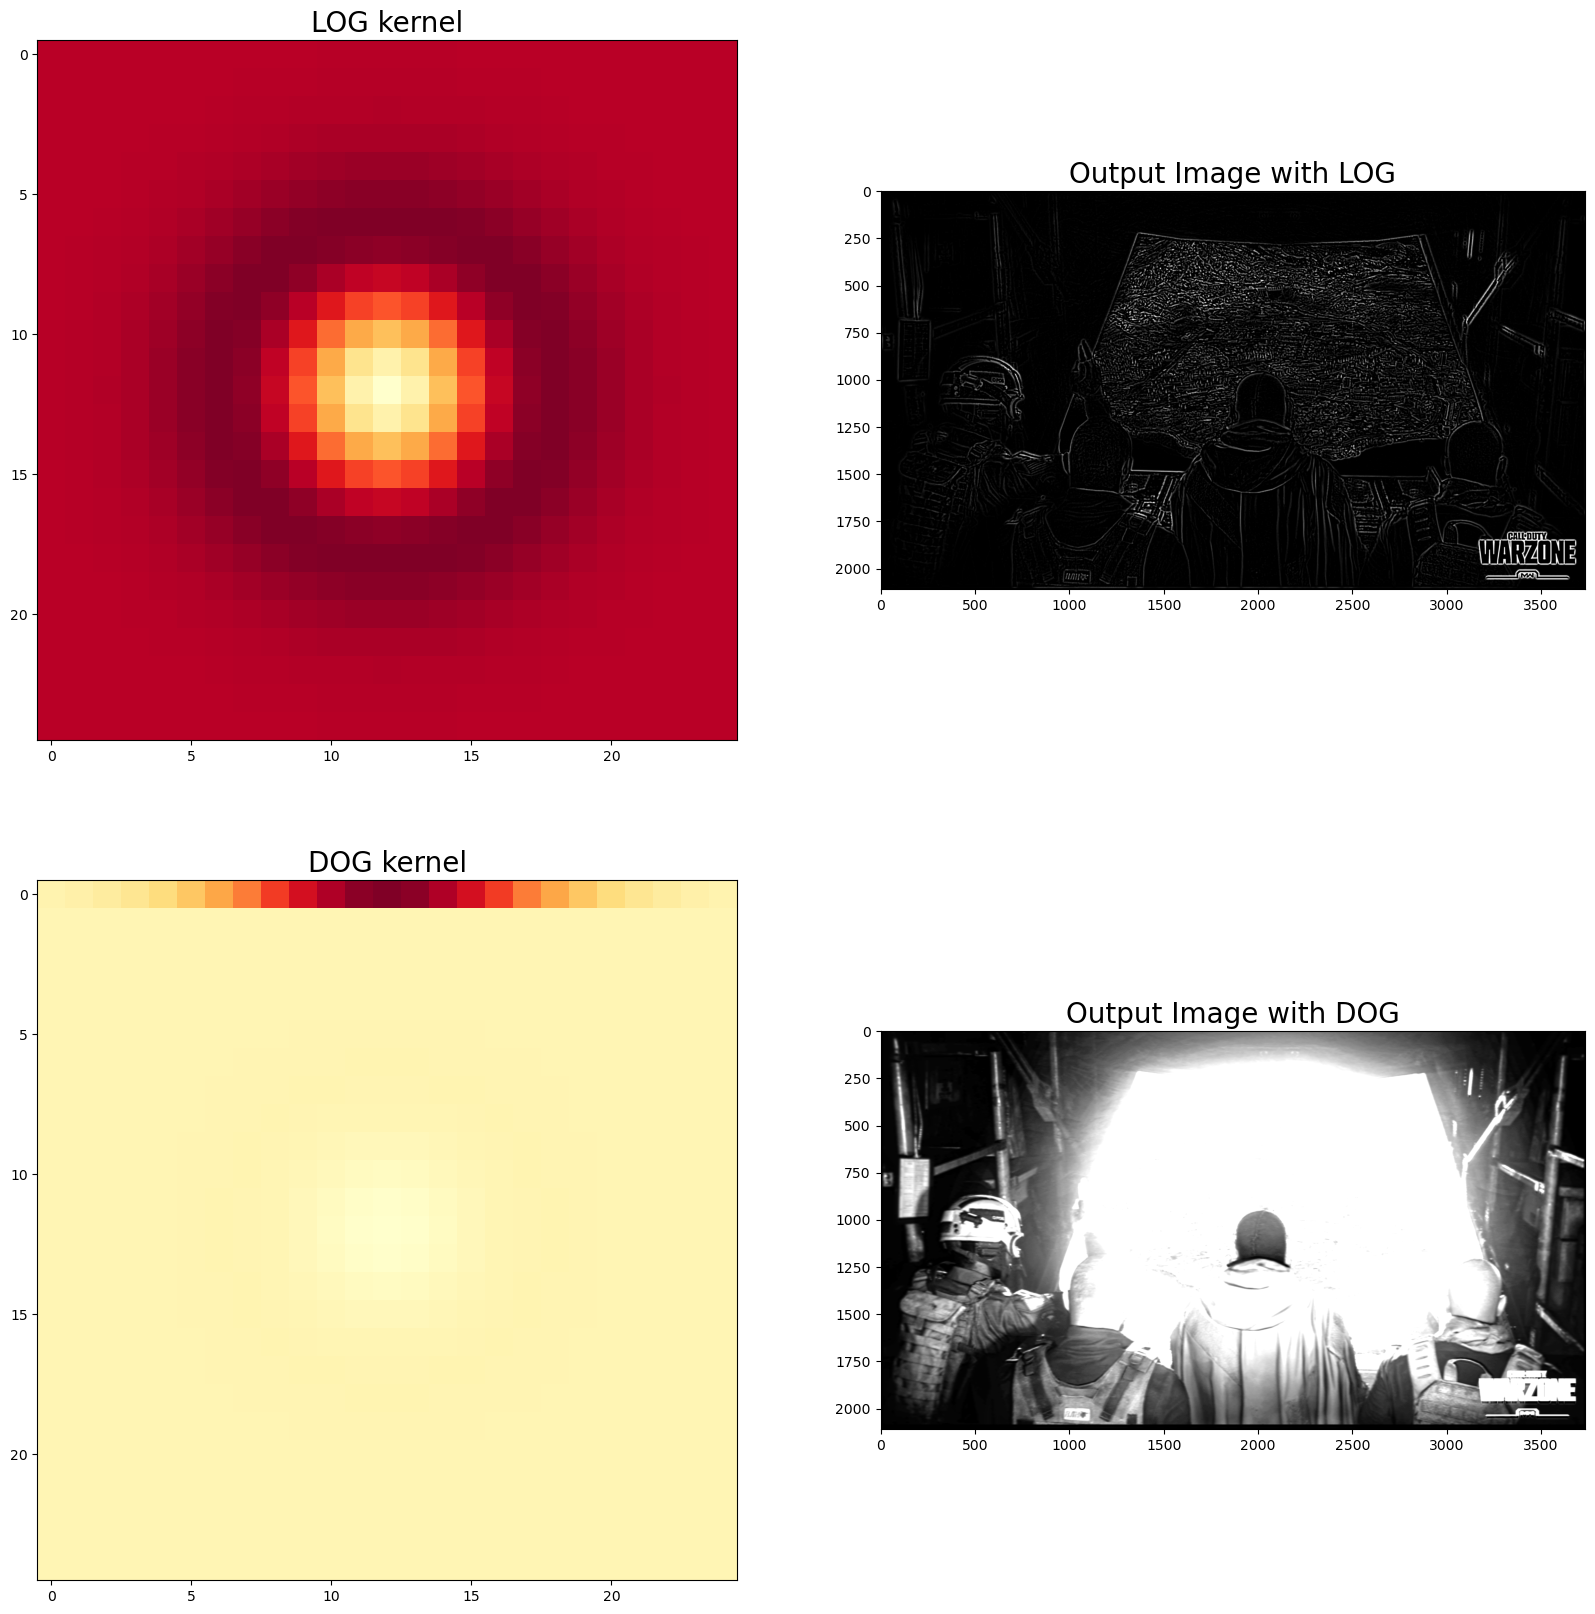

In [3]:
def plot_kernel(kernel, s, name):
    pylab.imshow(kernel, cmap="YlOrRd")
def LOG(k=12, s=3):
    n = 2*k+1 # size of kernel
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            kernel[i,j] = -(1-((i-k)**2+(j-k)**2)/(2*s**2))*np.exp(-((i-k)**2+(j-k)**2)/(2*s**2))/(pi*s**4)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()), 3)
    return kernel
def DOG(k=12, s=3):
    n = 2*k+1 #size of the kernel
    s1, s2 = s * np.sqrt(2), s / np.sqrt(2)
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            kernel[i,j] = np.exp(-((i-k)**2+(j-k)**2)/(2*s1**2))/(2*pi*s1**2) - np.exp(-((i-k)**2+(j-k)**2)/(2*s2**2))/(2*pi*s2**2)
        kernel = np.round(kernel / np.sqrt((kernel**2).sum()), 3)
    return kernel
s = 3
img = rgb2gray(imread("fcc.jpg"))
kernel = LOG()
outimg = convolve2d(img, kernel)
pylab.figure(figsize=(20,20))
pylab.subplot(221), pylab.title("LOG kernel",size=20),plot_kernel(kernel, s, "DOG")
pylab.subplot(222), pylab.title("Output Image with LOG",size=20)
pylab.imshow(np.clip(outimg, 0, 1), cmap="gray") # clip between 0 to 1
kernel = DOG()
outimg = convolve2d(img, DOG())
pylab.subplot(223), pylab.title("DOG kernel",size=20),plot_kernel(kernel, s, "DOG")
pylab.subplot(224), pylab.title("Output Image with DOG",size=20)
pylab.imshow(np.clip(outimg, 0, 1), cmap="gray") # clip between 0 to 1
pylab.show()
